In [116]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import torch
from torch import nn

n_samples = 10000
X, y = make_blobs(n_samples=n_samples, n_features=10, centers=5, cluster_std=1.0, random_state=42)

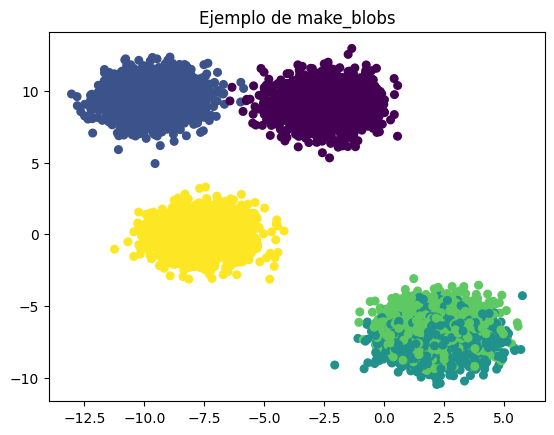

In [117]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", s=30)
plt.title("Ejemplo de make_blobs")
plt.show()

In [118]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [119]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.long)

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
class SimpleModel(nn.Module):
	def __init__(self, in_features=10, hidden=32, out_features=5):
		super().__init__()

		self.layer_1 = nn.Linear(in_features, hidden)
		self.layer_2 = nn.Linear(hidden, hidden)
		self.layer_3 = nn.Linear(hidden, out_features)

	def forward(self, x):
		x = torch.relu(self.layer_1(x))
		x = torch.tanh(self.layer_2(x))
		logits = self.layer_3(x)
		return logits

In [122]:
simple_model = SimpleModel(in_features=10, hidden=32, out_features=5).to(device)

In [123]:
simple_model.eval()
with torch.no_grad():
	logits = simple_model(X_test.to(device))
	probs  = torch.softmax(logits, dim=1)
	untrained_preds  = probs.argmax(dim=1)
print(f"Length of logits: {len(logits)}, Shape: {logits.shape}")
print(f"Length of probabilities: {len(probs)}, Shape: {probs.shape}")
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of logits: 2000, Shape: torch.Size([2000, 5])
Length of probabilities: 2000, Shape: torch.Size([2000, 5])
Length of predictions: 2000, Shape: torch.Size([2000])
Length of test samples: 2000, Shape: torch.Size([2000])

First 10 predictions:
tensor([0, 2, 2, 0, 0, 0, 2, 0, 2, 2])

First 10 test labels:
tensor([0, 2, 0, 4, 4, 1, 2, 0, 2, 2])


In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(simple_model.parameters(), lr=1e-3)

def accuracy_fn(y_true, y_pred):
	return (y_true == y_pred).float().mean().item() * 100

torch.manual_seed(42)
epochs = 1000

for epoch in range(epochs):
	simple_model.train()
	logits = simple_model(X_train)       
	loss = loss_fn(logits, y_train)        
	preds = logits.argmax(dim=1)          
	acc = accuracy_fn(y_train, preds)

	optimizer.zero_grad()
	loss.backward()
	optimizer.step()

	simple_model.eval()
	with torch.inference_mode():
		test_logits = simple_model(X_test)
		test_loss = loss_fn(test_logits, y_test)
		test_preds = test_logits.argmax(dim=1)
		test_acc = accuracy_fn(y_test, test_preds)

	if epoch % 10 == 0:
		print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

simple_model.eval()
with torch.inference_mode():
	logits = simple_model(X_test)
	probs = torch.softmax(logits, dim=1)
	preds = probs.argmax(dim=1)
	print("\nFirst 10 preds:", preds[:10].tolist())
	print("First 10 labels:", y_test[:10].tolist())

Epoch: 0 | Loss: 1.72319, Acc: 29.18% | Test loss: 1.67155, Test acc: 36.25%
Epoch: 10 | Loss: 1.21858, Acc: 63.05% | Test loss: 1.18193, Test acc: 67.15%
Epoch: 20 | Loss: 0.85876, Acc: 89.07% | Test loss: 0.83551, Test acc: 94.00%
Epoch: 30 | Loss: 0.60845, Acc: 100.00% | Test loss: 0.59219, Test acc: 100.00%
Epoch: 40 | Loss: 0.42737, Acc: 100.00% | Test loss: 0.41589, Test acc: 100.00%
Epoch: 50 | Loss: 0.30210, Acc: 100.00% | Test loss: 0.29460, Test acc: 100.00%
Epoch: 60 | Loss: 0.21705, Acc: 100.00% | Test loss: 0.21167, Test acc: 100.00%
Epoch: 70 | Loss: 0.15666, Acc: 100.00% | Test loss: 0.15295, Test acc: 100.00%
Epoch: 80 | Loss: 0.11821, Acc: 100.00% | Test loss: 0.11610, Test acc: 100.00%
Epoch: 90 | Loss: 0.09431, Acc: 100.00% | Test loss: 0.09291, Test acc: 100.00%
Epoch: 100 | Loss: 0.07805, Acc: 100.00% | Test loss: 0.07713, Test acc: 100.00%
Epoch: 110 | Loss: 0.06684, Acc: 100.00% | Test loss: 0.06619, Test acc: 100.00%
Epoch: 120 | Loss: 0.05856, Acc: 100.00% | Te